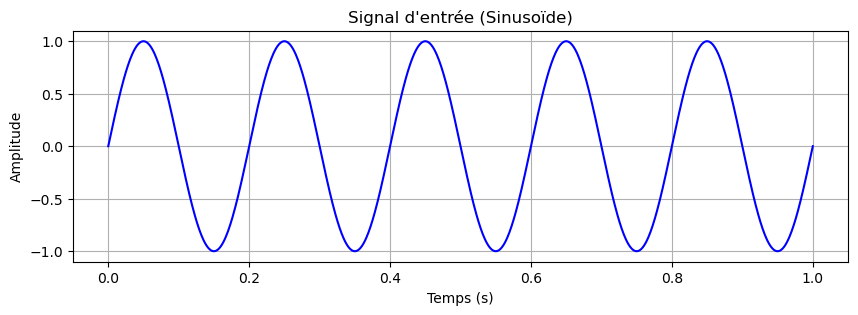

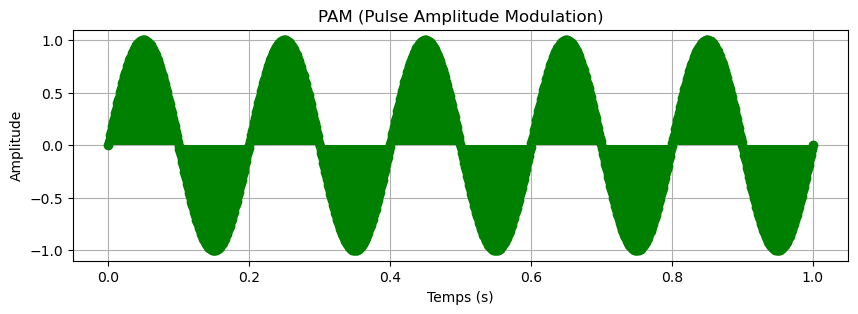

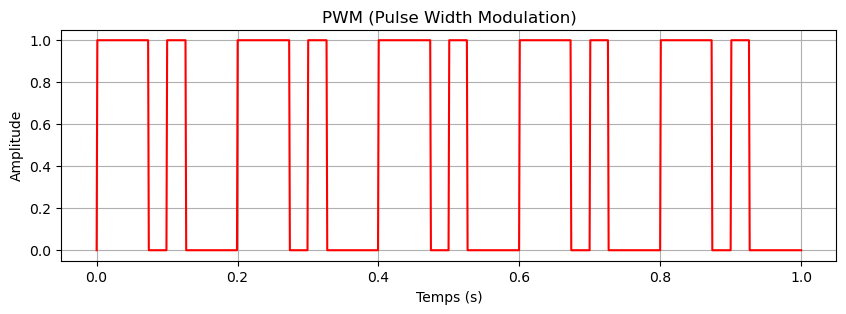

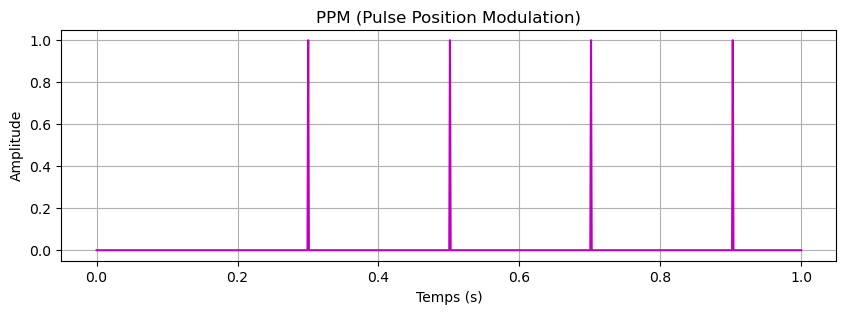

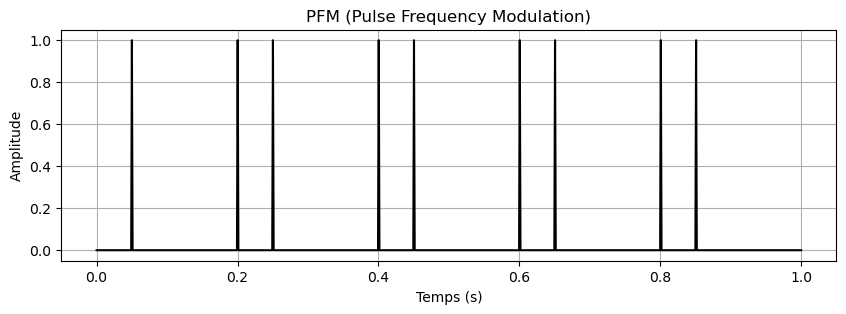

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres généraux
fs = 1000  # Fréquence d'échantillonnage (Hz)
T = 1      # Durée du signal (s)
t = np.linspace(0, T, fs)  # Axe du temps

# Signal d'entrée : une sinusoïde
f_signal = 5  # Fréquence du signal (Hz)
signal = np.sin(2 * np.pi * f_signal * t)

### 1. Modulation PAM (Pulse Amplitude Modulation)
def pam_modulation(signal):
    """La modulation PAM suit directement l'amplitude du signal."""
    return signal

pam_signal = pam_modulation(signal)

### 2. Modulation PWM (Pulse Width Modulation)
def pwm_modulation(signal, t):
    """La modulation PWM utilise une onde en dent de scie comme référence pour générer des impulsions de largeur variable."""
    sawtooth = 2 * (t * f_signal - np.floor(0.5 + t * f_signal))  # Génération de l'onde en dent de scie
    return np.where(signal > sawtooth, 1, 0)  # Comparaison pour générer les impulsions

pwm_signal = pwm_modulation(signal, t)

### 3. Modulation PPM (Pulse Position Modulation)
def ppm_modulation(signal, t):
    """La modulation PPM décale la position des impulsions en fonction de l'amplitude du signal."""
    ppm = np.zeros_like(t)
    for i in range(1, len(t)-1):
        if signal[i-1] < 0 and signal[i] >= 0:  # Détection du passage par zéro
            ppm[i + int((signal[i] + 1) * (fs // (2 * f_signal)))] = 1  # Décalage de l'impulsion
    return ppm

ppm_signal = ppm_modulation(signal, t)

### 4. Modulation PFM (Pulse Frequency Modulation)
def pfm_modulation(signal, t):
    """La modulation PFM fait varier la fréquence des impulsions en fonction de l'amplitude du signal."""
    pfm = np.zeros_like(t)
    threshold = 0  # Seuil de déclenchement
    last_pulse_time = 0
    for i in range(len(t)):
        if signal[i] > threshold and (t[i] - last_pulse_time) > (1 / (10 + 10 * signal[i])):  # Variation de fréquence
            pfm[i] = 1
            last_pulse_time = t[i]
    return pfm

pfm_signal = pfm_modulation(signal, t)

### Affichage des figures séparées

def plot_signal(title, signal, color, style='-'):
    """Fonction pour afficher une modulation dans une figure séparée."""
    plt.figure(figsize=(10, 3))
    plt.plot(t, signal, color + style)
    plt.title(title)
    plt.xlabel("Temps (s)")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

# Affichage du signal original
plot_signal("Signal d'entrée (Sinusoïde)", signal, 'b')

# Affichage PAM
plt.figure(figsize=(10, 3))
plt.stem(t, pam_signal, linefmt='g-', markerfmt='go', basefmt=" ")
plt.title("PAM (Pulse Amplitude Modulation)")
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Affichage PWM
plot_signal("PWM (Pulse Width Modulation)", pwm_signal, 'r')

# Affichage PPM
plot_signal("PPM (Pulse Position Modulation)", ppm_signal, 'm')

# Affichage PFM
plot_signal("PFM (Pulse Frequency Modulation)", pfm_signal, 'k')